In [1]:
# Data analysis and visualization
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing_npz',
    test_split=0.2,
    seed=42
)


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Checking the data shape and type
X_train.shape, type(X_train), X_test.shape, type(X_test), y_train.shape, type(y_train), y_test.shape, type(y_test)


((404, 13),
 numpy.ndarray,
 (102, 13),
 numpy.ndarray,
 (404,),
 numpy.ndarray,
 (102,),
 numpy.ndarray)

In [4]:
# Convert Data to DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Preview training data
X_train_df.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [5]:
# View dataset summary
X_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [6]:
# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), list(range(13)))
)

# Normalize data
X_train = ct.fit_transform(X_train).astype('float32')
X_test = ct.transform(X_test).astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [7]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((363, 13), (41, 13), (363,), (41,))

In [8]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X_train.shape[1],), name='Dense_1'),
    tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
    tf.keras.layers.Dense(units=1, name='Prediction')
])

# Compile the model
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=['mse']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val)
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 392.7166 - mse: 392.7166 - val_loss: 147.7260 - val_mse: 147.7260
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 97.1553 - mse: 97.1553 - val_loss: 92.6517 - val_mse: 92.6517
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 60.0067 - mse: 60.0067 - val_loss: 66.4212 - val_mse: 66.4212
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 46.1802 - mse: 46.1802 - val_loss: 55.6154 - val_mse: 55.6154
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 40.9689 - mse: 40.9689 - val_loss: 48.8072 - val_mse: 48.8072
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.2969 - mse: 37.2969 - val_loss: 43.2608 - val_mse: 43.2608
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 34.1863 - mse: 34.1863 - val_loss: 38.7783 - val_mse: 38.7783
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31.6276 - mse: 31.6276 - val_loss: 34.9286 - val_mse: 34.9286
Epoch 9/50
12/12 ━━━━━━━━━━━

In [10]:
# Evaluate the model on test data
loss, mse = model.evaluate(X_test, y_test, batch_size=32)
print(f"Model loss on test set: {loss}")
print(f"Model mean squared error on test set: {mse:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.7344 - mse: 23.7344 
Model loss on test set: 26.27790069580078
Model mean squared error on test set: 26.28


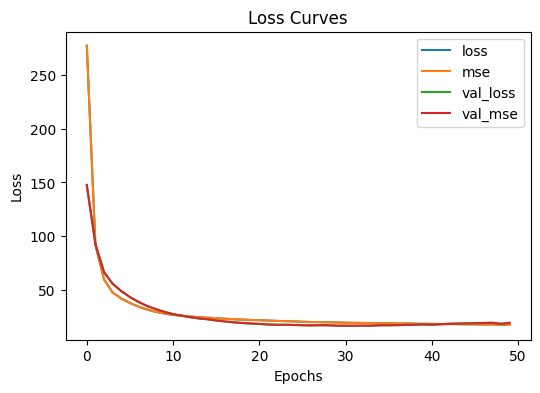

In [11]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()


In [12]:
# Make predictions
y_pred = model.predict(X_test)

# View first prediction
y_pred[0]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([23.688572], dtype=float32)

### **Theory:**

Linear regression is a foundational machine learning algorithm that aims to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data. The general equation for a linear regression model is:

$\ y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b$

where:
- $y$ is the predicted output (dependent variable),
- $x_1, x_2, \dots, x_n$ are the input features (independent variables),
- $w_1, w_2, \dots, w_n$ are the weights (parameters of the model),
- $b$ is the bias term.

In traditional linear regression, we directly compute the optimal values for the weights $w$ and bias $b$ using methods like Ordinary Least Squares (OLS) or Gradient Descent. The goal is to minimize the error between the predicted output and the actual target by optimizing these parameters.

### **Linear Regression Using Deep Neural Networks (DNN)**

A Deep Neural Network (DNN) can also be used to perform linear regression, although this is somewhat overkill compared to simpler models. The main difference when using DNNs for linear regression lies in how the model is structured and trained.

### **Key Concepts:**

1. **Neural Network Architecture:**
   - In a simple deep neural network for linear regression, the architecture would typically consist of an input layer, one or more hidden layers, and an output layer.
   - For linear regression, the **output layer** would have a single neuron (since we are predicting a single continuous value).
   - The **hidden layers** can consist of multiple neurons, but in the case of linear regression, a simple DNN might not require many hidden layers. The network essentially learns the same underlying linear relationship through multiple layers, making it a more complex and computationally intensive approach than traditional linear regression.

2. **Activation Functions:**
   - The hidden layers may use **non-linear activation functions** like ReLU, sigmoid, or tanh. However, for the final output layer in linear regression, the **activation function** would generally be **linear** (i.e., no activation function) to ensure that the output is continuous and not bounded (as required in regression tasks).

3. **Model Learning:**
   - The DNN learns to approximate the weights $w_1, w_2, \dots, w_n$ and the bias $b$ by adjusting the weights through backpropagation. This is done using gradient descent or other optimization algorithms to minimize a loss function, typically **Mean Squared Error (MSE)**, which measures the difference between predicted and actual target values.

   - The loss function for linear regression using DNN is often:

      $\ L(w, b) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$

   where $\hat{y}_i$ is the predicted value, $y_i$ is the actual value, and $N$ is the number of samples in the dataset.

4. **Gradient Descent:**
   - The DNN uses **gradient descent** (or its variants like Stochastic Gradient Descent or Adam) to minimize the loss function by adjusting the weights and biases. The gradients of the loss with respect to each parameter are computed, and the parameters are updated in the opposite direction of the gradient to reduce the loss.


### **Why Use DNN for Linear Regression?**
Using a DNN for linear regression provides several advantages over traditional linear regression methods:

Non-linearity: Even though linear regression itself is linear, DNNs allow for non-linear transformations and feature interactions in hidden layers, which might be beneficial for complex data that has underlying non-linear relationships. However, for pure linear regression, a DNN might not offer any advantages over simpler methods.

Flexibility: DNNs can be adapted for regression tasks in more complex scenarios, where linear relationships might be present but with more complicated feature interactions.

Scalability: For very large datasets, DNNs can efficiently learn the optimal weights through mini-batch gradient descent, which is more scalable compared to traditional methods like OLS.
